In [45]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [85]:
#combining no of csv file into one file with name combine_csv
os.chdir('D:\TESTTT')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv


In [86]:
df.drop(['AP1RSS','AP2RSS','AP3RSS'],axis=1,inplace=True)

In [87]:
dff=df.assign(Product_RTT=df['AP1RTT']*df['AP2RTT']*df['AP3RTT'],Product_RTT12=df['AP1RTT']*df['AP2RTT'],Product_RTT23=df['AP2RTT']*df['AP3RTT'],Product_RTT13=df['AP1RTT']*df['AP3RTT'],square_RTT1=df['AP1RTT']*df['AP1RTT'],square_RTT2=df['AP2RTT']*df['AP2RTT'],square_RTT3=df['AP3RTT']*df['AP3RTT'])


In [88]:
import pandas as pd

# Group the DataFrame by 'x' and 'y'
groups = dff.groupby(['x', 'y'])

# Split the groups into two separate dataframes
df1 = pd.concat([group.iloc[:len(group) // 2] for _, group in groups])
df2 = pd.concat([group.iloc[len(group) // 2:] for _, group in groups])


In [89]:
new_name={'AP1RTT':'AP1RTTA','AP1STDEV':'AP1STDEVA','AP2RTT':'AP2RTTA','AP2STDEV':'AP2STDEVA','AP3RTT':'AP3RTTA','AP3STDEV':'AP3STDEVA','Product_RTT':'Product_RTTA','Product_RTT12':'Product_RTT12A','Product_RTT13':'Product_RTT13A','square_RTT1':'square_RTT1A','square_RTT2':'square_RTT2A','square_RTT3':'square_RTT3A'}
df1.rename(columns=new_name,inplace=True)

In [90]:
new_name={'AP1RTT':'AP1RTTB','AP1STDEV':'AP1STDEVB','AP2RTT':'AP2RTTB','AP2STDEV':'AP2STDEVB','AP3RTT':'AP3RTTB','AP3STDEV':'AP3STDEVB','Product_RTT':'Product_RTTB','Product_RTT12':'Product_RTT12B','Product_RTT13':'Product_RTT13B','square_RTT1':'square_RTT1B','square_RTT2':'square_RTT2B','square_RTT3':'square_RTT3B'}
df2.rename(columns=new_name,inplace=True)

In [91]:
# group the data by x and y values, and calculate the mean of each group
groupedd1 = df1.groupby(['x', 'y']).mean()
groupedd2 = df2.groupby(['x', 'y']).mean()

In [92]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
grouped = df1.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df1.groupby(['x', 'y']).mean()
grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()


In [93]:
import numpy as np
import pandas as pd

# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
groupedd = df2.groupby(['x', 'y']).agg(['min', 'max', lambda x: np.percentile(x, q=25), lambda x: np.percentile(x, q=50), lambda x: np.percentile(x, q=75)])

# Add the mean or average value of each column to the grouped dataframe
grouped_mean = df2.groupby(['x', 'y']).mean()
groupedd = pd.concat([groupedd, grouped_mean], axis=1)

# Rename the columns and reset the index
groupedd.columns = ['_'.join(col).strip() for col in groupedd.columns.values]
groupedd = groupedd.reset_index()

In [94]:
new_name={'AP1RTTA_<lambda_0>': 'AP1RTTA_25','AP2RTTA_<lambda_0>': 'AP2RTTA_25','AP3RTTA_<lambda_0>': 'AP3RTTA_25',
          'AP1RTTA_<lambda_1>': 'AP1RTTA_50','AP2RTTA_<lambda_1>': 'AP2RTTA_50','AP3RTTA_<lambda_1>': 'AP3RTTA_50',
          'AP1RTTA_<lambda_2>': 'AP1RTTA_75','AP2RTTA_<lambda_2>': 'AP2RTTA_75','AP3RTTA_<lambda_2>': 'AP3RTTA_75',
           
             
          'AP1STDEVA_<lambda_0>':'AP1STDEVA_25','AP2STDEVA_<lambda_0>':'AP2STDEVA_25','AP3STDEVA_<lambda_0>':'AP3STDEVA_25',
          'AP1STDEVA_<lambda_1>':'AP1STDEVA_50','AP2STDEVA_<lambda_1>':'AP2STDEVA_50','AP3STDEVA_<lambda_1>':'AP3STDEVA_50',
          'AP1STDEVA_<lambda_2>':'AP1STDEVA_75','AP2STDEVA_<lambda_2>':'AP2STDEVA_75','AP3STDEVA_<lambda_2>':'AP3STDEVA_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
grouped.rename(columns=new_name,inplace=True)

In [95]:
new_name={'AP1RTTB_<lambda_0>': 'AP1RTTB_25','AP2RTTB_<lambda_0>': 'AP2RTTB_25','AP3RTTB_<lambda_0>': 'AP3RTTB_25',
          'AP1RTTB_<lambda_1>': 'AP1RTTB_50','AP2RTTB_<lambda_1>': 'AP2RTTB_50','AP3RTTB_<lambda_1>': 'AP3RTTB_50',
          'AP1RTTB_<lambda_2>': 'AP1RTTB_75','AP2RTTB_<lambda_2>': 'AP2RTTB_75','AP3RTTB_<lambda_2>': 'AP3RTTB_75',
           
             
          'AP1STDEVB_<lambda_0>':'AP1STDEVB_25','AP2STDEVB_<lambda_0>':'AP2STDEVB_25','AP3STDEVB_<lambda_0>':'AP3STDEVB_25',
          'AP1STDEVB_<lambda_1>':'AP1STDEVB_50','AP2STDEVB_<lambda_1>':'AP2STDEVB_50','AP3STDEVB_<lambda_1>':'AP3STDEVB_50',
          'AP1STDEVB_<lambda_2>':'AP1STDEVB_75','AP2STDEVB_<lambda_2>':'AP2STDEVB_75','AP3STDEVB_<lambda_2>':'AP3STDEVB_75',
          'A_P_1_R_T_T_A':'AP1RTTA_MEAN','A_P_2_R_T_T_A':'AP2RTTA_MEAN','A_P_3_R_T_T_A_A':'AP3RTTA_MEAN',
          'A_P_1_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_2_S_T_D_E_V_A':'AP1STDEVA_MEAN','A_P_3_S_T_D_E_V_A':'AP1STDEVA_MEAN'}
groupedd.rename(columns=new_name,inplace=True)

In [96]:
input_data=grouped.iloc[:,2:] 
output_data = grouped.iloc[:, :2]
first_df=grouped.iloc[:,2:] 
second_df=groupedd.iloc[:,2:] 
input_data = pd.concat([first_df, second_df], axis=1)
output_data = grouped.iloc[:, :2]

In [97]:
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [98]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(38, 2)
(38, 156)


In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
#X_val=sc.fit_transform(X_val)

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 100}
Mean Squared Error in meter: 1.396
Root Mean Squared Error (RMSE) on new data in meter: 1.182


In [102]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.40
Root Mean Squared Error (RMSE) on new data in m: 1.18


In [103]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(156,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu', 'sigmoid', 'tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model


In [104]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='testttt',
    project_name='helloooo')

INFO:tensorflow:Reloading Tuner from testttt\helloooo\tuner0.json


In [105]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [106]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=12)])

Epoch 1/500
1/1 [==============================] - 0s 341ms/step - loss: 18.3048 - mse: 18.3048 - val_loss: 22.5050 - val_mse: 22.5050
Epoch 2/500
1/1 [==============================] - 0s 17ms/step - loss: 17.1093 - mse: 17.1093 - val_loss: 21.9454 - val_mse: 21.9454
Epoch 3/500
1/1 [==============================] - 0s 17ms/step - loss: 17.3671 - mse: 17.3671 - val_loss: 21.4003 - val_mse: 21.4003
Epoch 4/500
1/1 [==============================] - 0s 16ms/step - loss: 16.4693 - mse: 16.4693 - val_loss: 20.8645 - val_mse: 20.8645
Epoch 5/500
1/1 [==============================] - 0s 15ms/step - loss: 16.1568 - mse: 16.1568 - val_loss: 20.3372 - val_mse: 20.3372
Epoch 6/500
1/1 [==============================] - 0s 20ms/step - loss: 15.5805 - mse: 15.5805 - val_loss: 19.8169 - val_mse: 19.8169
Epoch 7/500
1/1 [==============================] - 0s 18ms/step - loss: 15.7510 - mse: 15.7510 - val_loss: 19.3061 - val_mse: 19.3061
Epoch 8/500
1/1 [==============================] - 0s 15ms/st

Epoch 63/500
1/1 [==============================] - 0s 14ms/step - loss: 4.1669 - mse: 4.1669 - val_loss: 4.0539 - val_mse: 4.0539
Epoch 64/500
1/1 [==============================] - 0s 16ms/step - loss: 3.3478 - mse: 3.3478 - val_loss: 3.9799 - val_mse: 3.9799
Epoch 65/500
1/1 [==============================] - 0s 16ms/step - loss: 2.7864 - mse: 2.7864 - val_loss: 3.9105 - val_mse: 3.9105
Epoch 66/500
1/1 [==============================] - 0s 17ms/step - loss: 3.5741 - mse: 3.5741 - val_loss: 3.8449 - val_mse: 3.8449
Epoch 67/500
1/1 [==============================] - 0s 17ms/step - loss: 3.3961 - mse: 3.3961 - val_loss: 3.7847 - val_mse: 3.7847
Epoch 68/500
1/1 [==============================] - 0s 13ms/step - loss: 3.7027 - mse: 3.7027 - val_loss: 3.7280 - val_mse: 3.7280
Epoch 69/500
1/1 [==============================] - 0s 17ms/step - loss: 3.1700 - mse: 3.1700 - val_loss: 3.6748 - val_mse: 3.6748
Epoch 70/500
1/1 [==============================] - 0s 17ms/step - loss: 3.2269 - m

1/1 [==============================] - 0s 17ms/step - loss: 2.2200 - mse: 2.2200 - val_loss: 1.6644 - val_mse: 1.6644
Epoch 126/500
1/1 [==============================] - 0s 17ms/step - loss: 2.5154 - mse: 2.5154 - val_loss: 1.6424 - val_mse: 1.6424
Epoch 127/500
1/1 [==============================] - 0s 15ms/step - loss: 1.9856 - mse: 1.9856 - val_loss: 1.6218 - val_mse: 1.6218
Epoch 128/500
1/1 [==============================] - 0s 21ms/step - loss: 2.2504 - mse: 2.2504 - val_loss: 1.6003 - val_mse: 1.6003
Epoch 129/500
1/1 [==============================] - 0s 13ms/step - loss: 1.7428 - mse: 1.7428 - val_loss: 1.5783 - val_mse: 1.5783
Epoch 130/500
1/1 [==============================] - 0s 17ms/step - loss: 2.0009 - mse: 2.0009 - val_loss: 1.5564 - val_mse: 1.5564
Epoch 131/500
1/1 [==============================] - 0s 17ms/step - loss: 1.6206 - mse: 1.6206 - val_loss: 1.5338 - val_mse: 1.5338
Epoch 132/500
1/1 [==============================] - 0s 16ms/step - loss: 1.6139 - mse: 1.

1/1 [==============================] - 0s 15ms/step - loss: 0.9310 - mse: 0.9310 - val_loss: 0.9666 - val_mse: 0.9666
Epoch 188/500
1/1 [==============================] - 0s 18ms/step - loss: 0.8737 - mse: 0.8737 - val_loss: 0.9629 - val_mse: 0.9629
Epoch 189/500
1/1 [==============================] - 0s 20ms/step - loss: 0.9310 - mse: 0.9310 - val_loss: 0.9597 - val_mse: 0.9597
Epoch 190/500
1/1 [==============================] - 0s 16ms/step - loss: 1.5445 - mse: 1.5445 - val_loss: 0.9565 - val_mse: 0.9565
Epoch 191/500
1/1 [==============================] - 0s 23ms/step - loss: 1.3758 - mse: 1.3758 - val_loss: 0.9556 - val_mse: 0.9556
Epoch 192/500
1/1 [==============================] - 0s 19ms/step - loss: 0.8912 - mse: 0.8912 - val_loss: 0.9541 - val_mse: 0.9541
Epoch 193/500
1/1 [==============================] - 0s 4ms/step - loss: 1.2135 - mse: 1.2135 - val_loss: 0.9495 - val_mse: 0.9495
Epoch 194/500
1/1 [==============================] - 0s 17ms/step - loss: 1.0652 - mse: 1.0

In [107]:

# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 13ms/step - loss: 0.9455 - mse: 0.9455


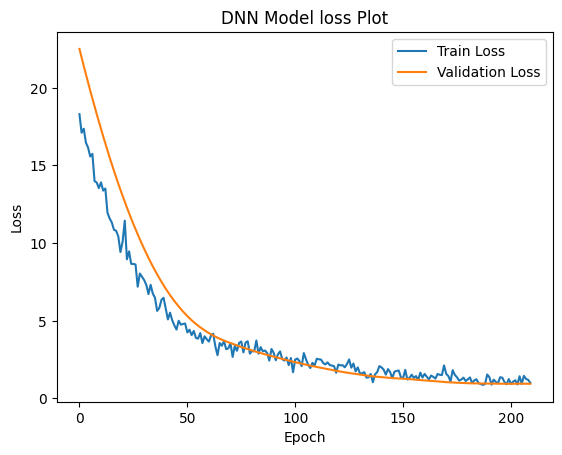

In [108]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [109]:
y_pred=dnn_model.predict(X_test)
y_pred

array([[4.9391823, 1.177852 ],
       [4.2985983, 7.39848  ],
       [1.1306645, 3.6096268],
       [1.8298153, 5.6132708],
       [4.7471304, 1.350629 ],
       [3.837812 , 6.853688 ],
       [2.1969137, 5.4250097],
       [5.259748 , 6.145041 ],
       [2.9035447, 4.707565 ],
       [3.1919887, 7.0361166],
       [2.2285905, 1.5405334],
       [2.3389356, 1.1422797]], dtype=float32)

In [110]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regr_model_xy.h5')


In [111]:
loaded_model = load_model('my_DNN_Regr_model_xy.h5')
loaded_model

In [112]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(y_pred, columns=['predicted_x','predicted_y'])

In [113]:
df_final = pd.DataFrame()
df_final = pd.concat([y_pred, y_test], axis=1)
df_final

,predicted_x,predicted_y,x,y
0,4.939182,1.177852,6,1
1,4.298598,7.398480,6,7
2,1.130664,3.609627,1,5
3,1.829815,5.613271,2,6
4,4.747130,1.350629,5,3
5,3.837812,6.853688,4,7
6,2.196914,5.425010,1,7
7,5.259748,6.145041,4,8
8,2.903545,4.707565,4,5
9,3.191989,7.036117,2,8


In [114]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))


Mean Squared Error (MSE) on new data in m: 0.95
Root Mean Squared Error (RMSE) on new data in m: 0.97


In [115]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3,5,7,9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

Best K value found by grid search: 3
Mean Squared Error (MSE) on new data in m: 1.14
Root Mean Squared Error (RMSE) on new data in m: 1.07


In [116]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)
# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))


Best Hyperparameters: {'max_depth': 2, 'n_estimators': 200}
Mean Squared Error in meter: 0.647
Root Mean Squared Error (RMSE) on new data in meter: 0.804


In [117]:
RF_pred

array([[5.08758333, 1.98391667],
       [4.28764881, 7.13391071],
       [1.88575992, 5.8897996 ],
       [1.82251587, 6.30711508],
       [5.07210714, 2.22153571],
       [4.04502976, 7.13797024],
       [1.82084921, 6.29869841],
       [4.07644643, 7.0468869 ],
       [2.79735516, 6.12656151],
       [3.0904881 , 6.94092857],
       [3.07696825, 2.0051746 ],
       [2.89186111, 1.72572222]])

In [118]:
y_test=pd.DataFrame(y_test,columns=['x','y'])
y_pred=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])

In [119]:
df_finall = pd.DataFrame()
df_finall = pd.concat([y_pred, y_test], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,5.087583,1.983917,6,1
1,4.287649,7.133911,6,7
2,1.885760,5.889800,1,5
3,1.822516,6.307115,2,6
4,5.072107,2.221536,5,3
5,4.045030,7.137970,4,7
6,1.820849,6.298698,1,7
7,4.076446,7.046887,4,8
8,2.797355,6.126562,4,5
9,3.090488,6.940929,2,8
